In [4]:
import networkx as nx
G=nx.DiGraph()

G.add_edges_from([(1,2),(1,3)])
G.add_node(1)
G.add_edge(1,2)
G.add_node("spam")       # adds node "spam"
G.add_nodes_from("spam") # adds 4 nodes: 's', 'p', 'a', 'm'

In [5]:
print G.number_of_nodes()
print G.number_of_edges()

8
2


In [6]:
print G.nodes()
print G.edges()

['a', 1, 2, 3, 'spam', 'm', 'p', 's']
[(1, 2), (1, 3)]


In [7]:
G.add_edge(2,1)

In [8]:
print G.edges()

[(1, 2), (1, 3), (2, 1)]


In [10]:
G[1]

{2: {}, 3: {}}

In [13]:
G.node[1]['name']="2D-map"
G.node[2]['name']="3D-zonal-map"

In [14]:
G.nodes()

['a', 1, 2, 3, 'spam', 'm', 'p', 's']

In [21]:
G.node[2]['name']

'3D-zonal-map'

In [40]:
G.nodes()

['a', 1, 2, 3, 4, 'spam']

In [23]:
G.successors(1)


[2, 3]

In [24]:
G.successors(2)

[1]

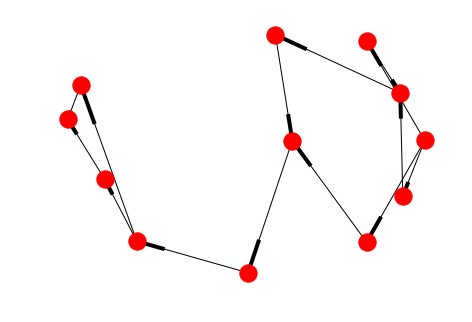

[u'n12',
 u'n10',
 u'n11',
 u'n8',
 u'n9',
 u'n1',
 u'n2',
 u'n3',
 u'n4',
 u'n5',
 u'n6',
 u'n7']

In [102]:
import matplotlib.pyplot as plt

nx.draw_spring(G)
plt.show()
G.nodes()

In [99]:
G.remove_nodes_from('mps')

In [39]:
G.add_node(4, name="4D-map")

In [41]:
G.node[4]

{'name': '4D-map'}

In [44]:
G.nodes(name=True)

TypeError: nodes() got an unexpected keyword argument 'name'

In [46]:
nx.has_path(G,2,1)

True

In [49]:
nx.has_path(G,3,1)

False

In [63]:
import json
import networkx as nx
G=nx.DiGraph()

PROM_DIR = "/home/soc/Downloads/prom/prom-6.6-all-platforms/"
jsoned = ""
with open(PROM_DIR + "jsoned_workflow_1.txt", "rt") as fin:
    for line in fin:
        jsoned = jsoned + line
jsoned = json.loads(jsoned)
page = jsoned['pnml']['net']['page']

for p in page['place']:
    print p['@id']
    G.add_node(p['@id'], name = p['name']['text']['$'], sort = 'place')

for t in page['transition']:
    print t['@id']
    G.add_node(t['@id'], name = t['name']['text']['$'], sort = 'transition')
    
for a in page['arc']:
    print a['@id']
    G.add_edge(a['@source'], a['@target'], name = a['name']['text']['$'], sort = 'arc')

n1
n2
n3
n4
n5
n6
n7
n8
n9
n10
n11
n12
arc13
arc14
arc15
arc16
arc17
arc18
arc19
arc20
arc21
arc22
arc23
arc24
arc25
arc26


In [92]:
import itertools
test_res = set(n for u,v,d in G.edges_iter(data=True)
               if d['sort']=='arc'
               for n in (u, v)
               if G.node[n]['sort']=='place')

print str(test_res)
comb = list(itertools.combinations(test_res,2))
uow = []
print comb
for i in comb:
    for j in G.successors(i[0]):
        if nx.has_path(G, j, i[1]):
            print (i[0], i[1])
            uow.append((i[0], i[1]))
            break
print uow

set([u'n1', u'n2', u'n3', u'n4', u'n5'])
[(u'n1', u'n2'), (u'n1', u'n3'), (u'n1', u'n4'), (u'n1', u'n5'), (u'n2', u'n3'), (u'n2', u'n4'), (u'n2', u'n5'), (u'n3', u'n4'), (u'n3', u'n5'), (u'n4', u'n5')]
(u'n1', u'n2')
(u'n1', u'n3')
(u'n1', u'n4')
(u'n1', u'n5')
(u'n3', u'n5')
(u'n4', u'n5')
[(u'n1', u'n2'), (u'n1', u'n3'), (u'n1', u'n4'), (u'n1', u'n5'), (u'n3', u'n5'), (u'n4', u'n5')]
